This script demonstrates the use of a Linear Regression model as a baseline to predict aerosol mixing state index (Chi) using different fraction of the fine-tuning training dataset. The baseline model's performance is evaluated and compared with the fine-tuned model results 
on the MEGAPOLI Marine test dataset.

Key steps include:

1. **Data Preprocessing**:
   - Clean the training dataset by removing rows with missing values.
   - Extract input features and the target variable for model training and testing.

2. **Model Training**:
   - Train a simple Linear Regression model on the selected fraction of the training data.
   - Extract model coefficients and intercept for interpretation.

3. **Evaluation**:
   - Predict Chi values on the test dataset.
   - Calculate evaluation metrics: R², RMSE, MAE, and MAPE.

4. **Visualization**:
   - Plot actual vs. predicted Chi values over the time axis for better interpretability.

5. **Comparison**:
   - The Linear Regression model serves as a baseline for benchmarking against more complex 
     fine-tuned models.

This workflow provides a foundational approach to compare simple baseline models with advanced 
models in aerosol research applications.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [16]:
# Load the training dataset
df_train = pd.read_csv('../Data/MEGAPOLI_data/MEGAPOLI_Marine_train_40%.csv')

# Remove rows with missing values
df_train = df_train.dropna()

# Define the input features
input_list = ['O3 (ppb)', 'CO (ppb)', 'NO (ppb)', 'NOx (ppb)',
              'ETH (ppb)', 'TOL(ppb)', 'XYL (ppb)', 'ALD2 (ppb)',
              'AONE (ppb)', 'PAR (ppb)', 'OLET (ppb)', 'Temperature(K)', 'RH',
              'BC (ug/m3)', 'OA (ug/m3)', 'NH4 (ug/m3)', 'NO3 (ug/m3)', 'SO4 (ug/m3)']

# Define the target variable (output)
output_list = df_train.columns[23]  # Assuming the target is the 24th column

# Split the dataset into input features (X) and target variable (y)
X_train = df_train[input_list]
y_train = df_train[output_list]

# Create a linear regression model
model = LinearRegression()

# Train the linear regression model on the training data
model.fit(X_train, y_train)

# Print the coefficients and intercept of the linear regression model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 2.11971947e-04 -4.10344893e-05  4.81003115e-04  7.56254575e-04
 -1.47033561e-02  1.20379116e-02 -6.85995780e-02 -7.85778126e-03
  8.14479426e-03  1.57636304e-03 -1.94265197e-02 -9.99766473e-03
  1.67435828e-01 -1.69325769e-02  2.11397264e-02  5.26746707e-03
  1.54209321e-03 -1.09801791e-02]
Intercept: 3.1892079015900996


In [17]:
def calculate_metrics_and_plot(y_true, y_pred, time_column):
    """
    Calculate evaluation metrics and plot actual vs. predicted values.

    Parameters:
    - y_true: Actual target values (ground truth).
    - y_pred: Predicted target values.
    - time_column: Corresponding time column for the x-axis.

    Returns:
    - r2, rmse, mae, mape: Calculated performance metrics.
    """
    # Calculate evaluation metrics
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Print the calculated metrics
    print(f'R2: {r2:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'MAPE: {mape:.4f}%')

    # Plot actual vs. predicted values over time
    plt.figure(figsize=(10, 6))
    plt.plot(time_column, y_true, label='Actual', color='blue', linewidth=2)
    plt.plot(time_column, y_pred, label='Predicted', color='red', linestyle='--', linewidth=2)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.title('Actual vs Predicted', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

    # Return the calculated metrics
    return r2, rmse, mae, mape


c:\Users\1\miniconda3\envs\partmc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2: 0.1022
RMSE: 0.0624
MAE: 0.0513
MAPE: 9.7951%


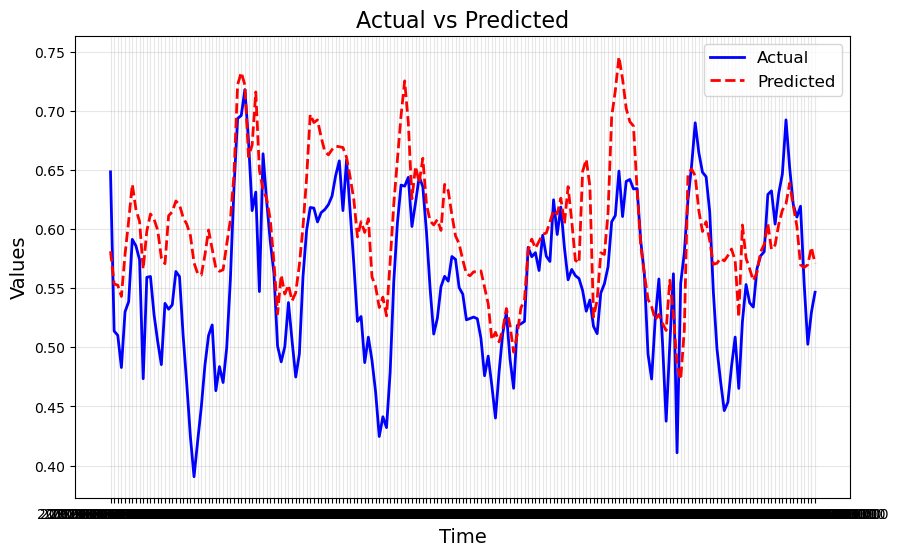

(0.10221187150299582,
 np.float64(0.06239841959316196),
 np.float64(0.05133947302409378),
 np.float64(9.795069530163447))

In [18]:
# Load test dataset
df_test = pd.read_csv('../Data/MEGAPOLI_data/MEGAPOLI_Marine_test_50%.csv')

# Extract input features and target variable from the test dataset
X_test = df_test[input_list]
y_test = df_test[output_list]

# Predict target values using the trained model
y_test_pred = model.predict(X_test)

# Save actual and predicted values to a CSV file for analysis
results_df = pd.DataFrame({
    'y_true': y_test,  # Actual target values
    'y_pred': y_test_pred  # Predicted target values
})
results_df.to_csv('../Data/Fine_tuned_Results_different_data_szie/LR_40%Data.csv', index=False)  # Save as a CSV file

# Calculate metrics and plot results
calculate_metrics_and_plot(y_test, y_test_pred, df_test['Time'])
